# Developers Salaries in 2024

The following analysis is of a dataset with developers salaries in 2024. I chose the set because it is pretty recent. One of the most obvious questions is what are the factors that determine Developer's salary and how much we can predict it with the given variables in the dataset. I will use the independent variables to first try multiple linear regression as one of the simplest models to understand its statistics. If the explanatory level of the model is low, i will try more complex models. . I will divide the data into a training and a test set for better evaluation of the results. 

First, I import the dataset into this Jupyter notebook. 

In [61]:
import pandas as pd
df_salaries_raw = pd.read_csv('Dataset salary 2024.csv')

In [62]:
import warnings
#Suppressing Intel MKL warnings
warnings.filterwarnings('ignore', message=".*Intel.*")

In [ ]:
I want to take a look at the first few lines of the dataset. 

In [63]:
print(df_salaries_raw.head())

   work_year experience_level employment_type                  job_title  \
0       2024               SE              FT                AI Engineer   
1       2024               SE              FT                AI Engineer   
2       2024               SE              FT              Data Engineer   
3       2024               SE              FT              Data Engineer   
4       2024               SE              FT  Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  202730             USD         202730                 US             0   
1   92118             USD          92118                 US             0   
2  130500             USD         130500                 US             0   
3   96000             USD          96000                 US             0   
4  190000             USD         190000                 US             0   

  company_location company_size  
0               US            M  
1           

In [64]:
unique_currencies = df_salaries_raw['salary_currency'].unique()
print(unique_currencies)

['USD' 'GBP' 'CAD' 'EUR' 'DKK' 'INR' 'ILS' 'BRL' 'CHF' 'NZD' 'AUD' 'PLN'
 'PHP' 'TRY' 'NOK' 'JPY' 'ZAR' 'HKD' 'SGD' 'THB' 'HUF' 'MXN' 'CLP']


In [65]:
#Printing the types of columns
print(df_salaries_raw.dtypes)

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


In [66]:
#Exchange rates as of 19 July 2024
exchange_rates = {
    'USD': 1.0,  # US Dollar
    'GBP': 1.29,  # British Pound
    'CAD': 0.73,  # Canadian Dollar
    'EUR': 1.09,   # Euro
    'DKK': 0.15,  # Danish Krone
    'INR': 0.012, # Indian Rupee
    'ILS': 0.27,  # Israeli Shekel
    'BRL': 0.18,   # Brazilian Real
    'CHF': 1.12,   # Swiss Franc
    'NZD': 0.60,  # New Zealand Dollar
    'AUD': 0.67,  # Australian Dollar
    'PLN': 0.25,  # Polish Zloty
    'PHP': 0.017, # Philippine Peso
    'TRY': 0.030, # Turkish Lira
    'NOK': 0.092, # Norwegian Krone
    'JPY': 0.0064,# Japanese Yen
    'ZAR': 0.055, # South African Rand
    'HKD': 0.13,  # Hong Kong Dollar
    'SGD': 0.74,  # Singapore Dollar
    'THB': 0.028, # Thai Baht
    'HUF': 0.0028,# Hungarian Forint
    'MXN': 0.056, # Mexican Peso
    'CLP': 0.0011 # Chilean Peso
}

#A function to exchange the salary from other currencies to USD. 
def currency_conversion_usd(row): 
    actual_rate = exchange_rates.get(row['salary_currency'])
    return actual_rate * row['salary']

#Applying the function to the dataframe
df_salaries_raw['salary_in_usd_new'] = df_salaries_raw.apply(currency_conversion_usd, axis = 1)

#Correlation between the salary_in_usd and the salary_in_usd_new
correlation = df_salaries_raw[['salary_in_usd', 'salary_in_usd_new']].corr()

print(correlation)

                   salary_in_usd  salary_in_usd_new
salary_in_usd           1.000000           0.999882
salary_in_usd_new       0.999882           1.000000


In [67]:
df_salaries_raw.drop('salary_in_usd', axis=1, inplace=True) #axis = 1 signifies we want to drop a column, not a row, and inplace = True signifies that I want to do the change in the original dataframe, not a new one. 

print(df_salaries_raw.head())

   work_year experience_level employment_type                  job_title  \
0       2024               SE              FT                AI Engineer   
1       2024               SE              FT                AI Engineer   
2       2024               SE              FT              Data Engineer   
3       2024               SE              FT              Data Engineer   
4       2024               SE              FT  Machine Learning Engineer   

   salary salary_currency employee_residence  remote_ratio company_location  \
0  202730             USD                 US             0               US   
1   92118             USD                 US             0               US   
2  130500             USD                 US             0               US   
3   96000             USD                 US             0               US   
4  190000             USD                 US             0               US   

  company_size  salary_in_usd_new  
0            M           202730.

In [68]:
#Counting NaN values in each column
nan_counts = df_salaries_raw.isna().sum()
print('NaN values per column:\n', nan_counts)

NaN values per column:
 work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
salary_in_usd_new     0
dtype: int64


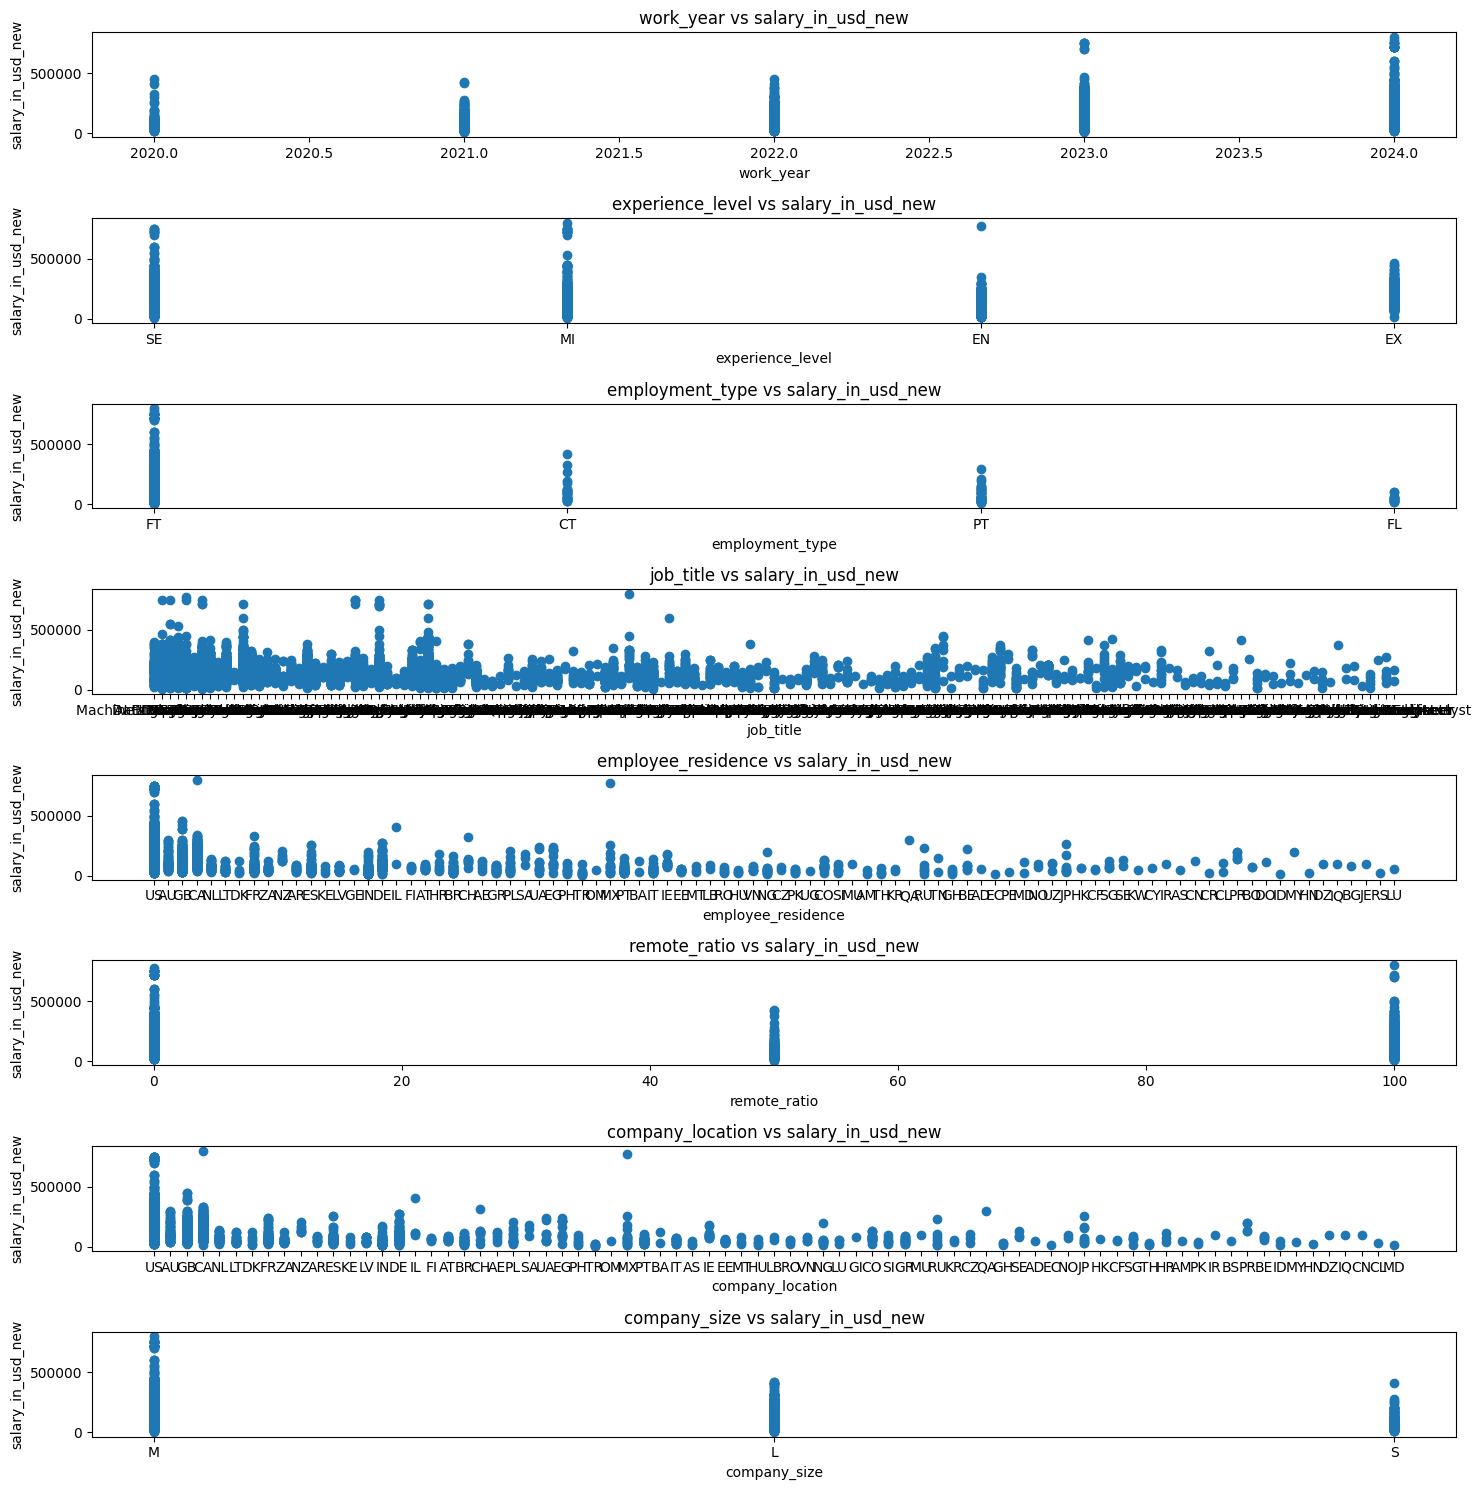

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

#A list of columns to plot against 'salary_in_usd_new'. Not including salary and salary_currency.
columns_to_plot = [
    'work_year', 'experience_level', 'employment_type', 'job_title', 
    'employee_residence', 'remote_ratio', 'company_location', 'company_size'
]

#Setting up the matplotlib figure
plt.figure(figsize=(15, 15))

#Looping through the columns and create scatter plots
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(len(columns_to_plot), 1, i)  # Create a subplot for each variable
    plt.scatter(df_salaries_raw[column], df_salaries_raw['salary_in_usd_new'])
    plt.xlabel(column)
    plt.ylabel('salary_in_usd_new')
    plt.title(f'{column} vs salary_in_usd_new')

#Adjusting layout to prevent overlap
plt.tight_layout()
plt.show()

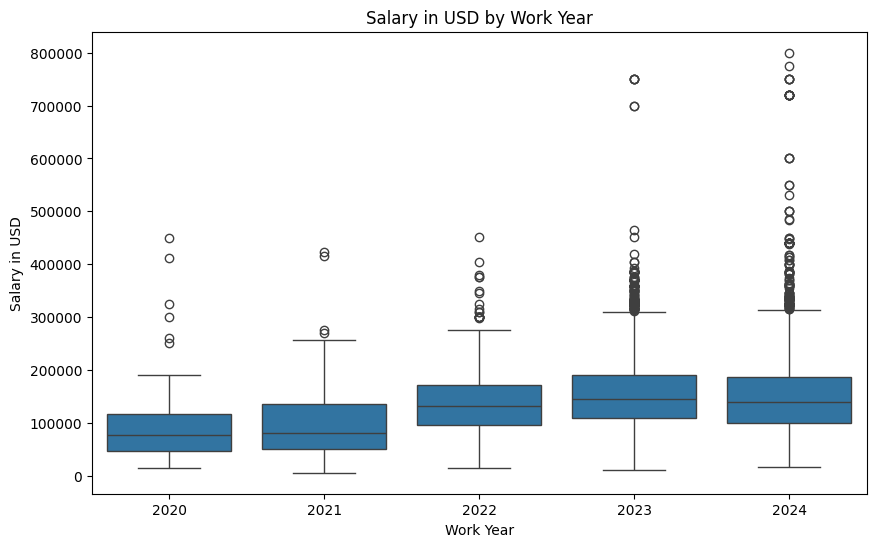

In [70]:
#Aggregating data by work year
work_year_salary = df_salaries_raw.groupby('work_year')['salary_in_usd_new'].mean().reset_index()

#Setting up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a box plot
sns.boxplot(x='work_year', y='salary_in_usd_new', data=df_salaries_raw)

# Add labels and title
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.title('Salary in USD by Work Year')

# Show the plot
plt.show()

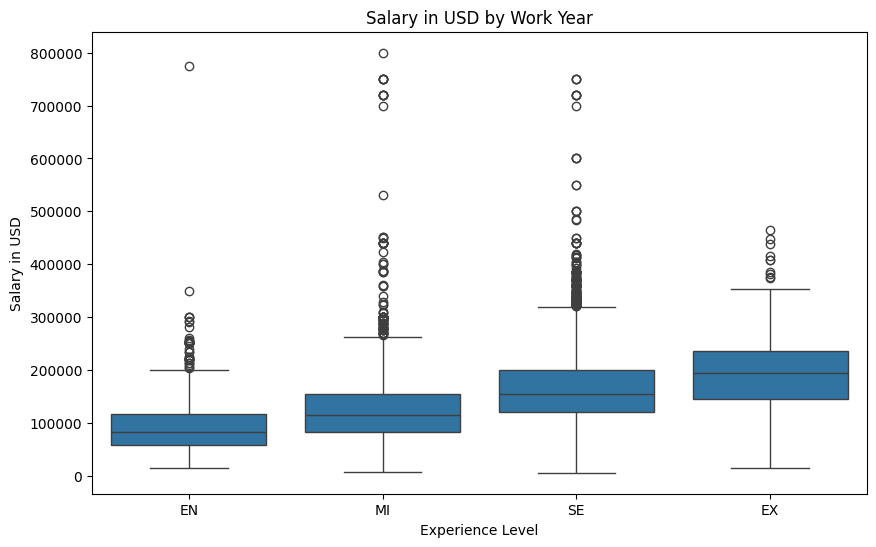

In [71]:
#Same for experience level
experience_salary = df_salaries_raw.groupby('experience_level')['salary_in_usd_new'].mean().reset_index()

plt.figure(figsize=(10, 6))

sns.boxplot(x='experience_level', y='salary_in_usd_new', data=df_salaries_raw, order=['EN', 'MI', 'SE','EX'])

plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.title('Salary in USD by Work Year')

plt.show()

In [72]:
#Getting the number of unique values for each column
unique_counts = df_salaries_raw.nunique()

#Selecting only categorical columns
categorical_columns = df_salaries_raw.select_dtypes(include=['object']).columns
unique_counts_categorical = unique_counts[categorical_columns]

#Printing the number of unique values for each categorical column
print(unique_counts_categorical)

experience_level        4
employment_type         4
job_title             155
salary_currency        23
employee_residence     88
company_location       77
company_size            3
dtype: int64


In [73]:
from scipy.stats import chi2_contingency

#Creating contingency tables
contingency_currency_location = pd.crosstab(df_salaries_raw['salary_currency'], df_salaries_raw['company_location'])
contingency_currency_residence = pd.crosstab(df_salaries_raw['salary_currency'], df_salaries_raw['employee_residence'])
contingency_location_residence = pd.crosstab(df_salaries_raw['company_location'], df_salaries_raw['employee_residence'])

#Performing Chi-Square Test
chi2_currency_location, p_currency_location, _, _ = chi2_contingency(contingency_currency_location)
chi2_currency_residence, p_currency_residence, _, _ = chi2_contingency(contingency_currency_residence)
chi2_location_residence, p_location_residence, _, _ = chi2_contingency(contingency_location_residence)

print('Chi-Square Test for salary currency and company location:')
print('Chi2 Statistic:', chi2_currency_location)
print('P-Value:', p_currency_location)

print('Chi-Square Test for salary currency and employee residence:')
print('Chi2 Statistic:', chi2_currency_residence)
print('P-Value:', p_currency_residence)

print('Chi-Square Test for company location and employee residence:')
print('Chi2 Statistic:', chi2_location_residence)
print('P-Value:', p_location_residence)

Chi-Square Test for salary currency and company location:
Chi2 Statistic: 186351.22026163532
P-Value: 0.0
Chi-Square Test for salary currency and employee residence:
Chi2 Statistic: 191764.19541591097
P-Value: 0.0
Chi-Square Test for company location and employee residence:
Chi2 Statistic: 994436.6658894424
P-Value: 0.0


In [77]:
print(df_salaries_raw.head())

   work_year experience_level employment_type                  job_title  \
0       2024               SE              FT                AI Engineer   
1       2024               SE              FT                AI Engineer   
2       2024               SE              FT              Data Engineer   
3       2024               SE              FT              Data Engineer   
4       2024               SE              FT  Machine Learning Engineer   

   salary salary_currency employee_residence  remote_ratio company_location  \
0  202730             USD                 US             0               US   
1   92118             USD                 US             0               US   
2  130500             USD                 US             0               US   
3   96000             USD                 US             0               US   
4  190000             USD                 US             0               US   

  company_size  salary_in_usd_new  
0            M           202730.

In [129]:
from sklearn.model_selection import train_test_split

#Splitting the data into a training and test set
train_df, test_df = train_test_split(df_salaries_raw, test_size=0.2, random_state=42)

#Columns for one-hot encoding
one_hot_columns = ['experience_level', 'employment_type', 'company_size']

#Applying one-hot encoding to the training set
train_df_encoded = pd.get_dummies(train_df, columns=one_hot_columns)

#Ensuring the same columns are in the test set
test_df_encoded = pd.get_dummies(test_df, columns=one_hot_columns)
test_df_encoded = test_df_encoded.reindex(columns=train_df_encoded.columns, fill_value=0)

#Dropping the 'job_title' column
train_df_encoded = train_df_encoded.drop(columns=['job_title'])
test_df_encoded = test_df_encoded.drop(columns=['job_title'])

#Target encoding: calculating mean salary for each currency in the training set
mean_salary = train_df.groupby('salary_currency')['salary_in_usd_new'].mean()

#Target encoding: mapping the mean salaries to both training and test sets
train_df_encoded['salary_currency_encoded'] = train_df['salary_currency'].map(mean_salary)
test_df_encoded['salary_currency_encoded'] = test_df['salary_currency'].map(mean_salary).fillna(mean_salary.mean())

#Dropping the original 'salary_currency' column after encoding
train_df_encoded = train_df_encoded.drop(columns=['salary_currency'])
test_df_encoded = test_df_encoded.drop(columns=['salary_currency'])

#Display the first few rows of the updated training and test DataFrames
print('Training dataframe:')
print(train_df_encoded.head())
print('---------------------------------')
print('Test dataframe:')
print(test_df_encoded.head())


Training dataframe:
       work_year  salary employee_residence  remote_ratio company_location  \
2109        2024   85000                 US             0               US   
15829       2022  141300                 US             0               US   
4125        2024  139000                 US             0               US   
8822        2023  136000                 US           100               US   
7517        2023  190000                 US             0               US   

       salary_in_usd_new  experience_level_EN  experience_level_EX  \
2109             85000.0                 True                False   
15829           141300.0                False                False   
4125            139000.0                False                False   
8822            136000.0                False                False   
7517            190000.0                False                 True   

       experience_level_MI  experience_level_SE  employment_type_CT  \
2109               

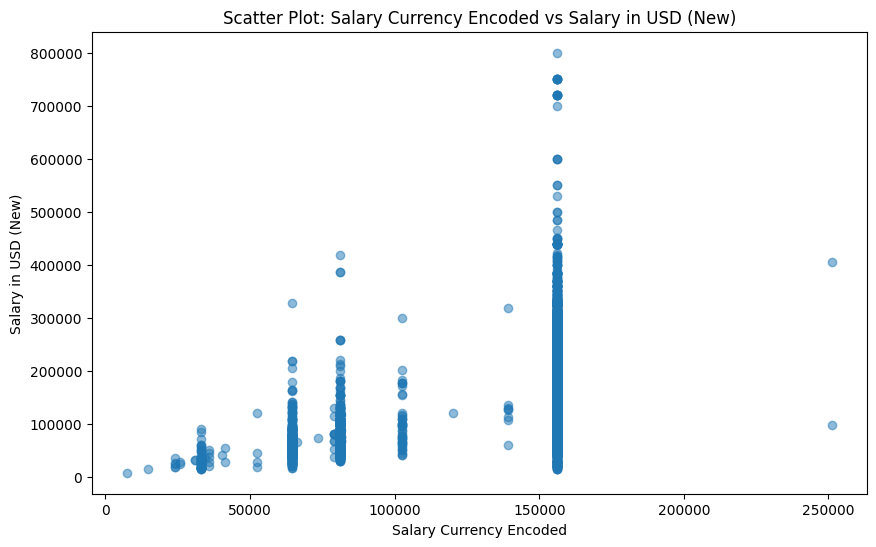

In [126]:
plt.figure(figsize=(10, 6))
plt.scatter(train_df_encoded['salary_currency_encoded'], train_df_encoded['salary_in_usd_new'], alpha=0.5)
plt.xlabel('Salary Currency Encoded')
plt.ylabel('Salary in USD (New)')
plt.title('Scatter Plot: Salary Currency Encoded vs Salary in USD (New)')
plt.show()

In [130]:
train_df_encoded.dtypes

work_year                    int64
salary                       int64
employee_residence          object
remote_ratio                 int64
company_location            object
salary_in_usd_new          float64
experience_level_EN           bool
experience_level_EX           bool
experience_level_MI           bool
experience_level_SE           bool
employment_type_CT            bool
employment_type_FL            bool
employment_type_FT            bool
employment_type_PT            bool
company_size_L                bool
company_size_M                bool
company_size_S                bool
salary_currency_encoded    float64
dtype: object

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

#Defining the features (independent variables) and the target (dependent variable)
#Excluding 'salary', 'employee_residence_encoded', and 'company_location_encoded'
X_train = train_df_encoded.drop(columns=['salary', 'company_location', 'employee_residence', 'salary_in_usd_new'])
y_train = train_df_encoded['salary_in_usd_new']

X_test = test_df_encoded.drop(columns=['salary', 'company_location', 'employee_residence','salary_in_usd_new'])
y_test = test_df_encoded['salary_in_usd_new']

#Standardizing the features since regression can be influenced by different scaling of the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Initializing and training the regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

#Predicting on the test data
y_test_pred = model.predict(X_test_scaled)

#Calculating evaluation metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Test Mean Absolute Error (MAE): {test_mae}')
print(f'Test R-squared (R2): {test_r2}')


Test Mean Absolute Error (MAE): 46058.41249465236
Test R-squared (R2): 0.18727387803200002


In [115]:
# Initialize the linear regression model with intercept
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train_scaled, y_train)

# Predict the salaries on the training data
y_train_pred = linear_model.predict(X_train_scaled)

# Predict the salaries on the test data
y_test_pred = linear_model.predict(X_test_scaled)

# Calculate evaluation metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training Mean Absolute Error (MAE): {train_mae}')
print(f'Training R-squared (R2): {train_r2}')

print(f'Test Mean Absolute Error (MAE): {test_mae}')
print(f'Test R-squared (R2): {test_r2}')


Training Mean Absolute Error (MAE): 46412.24632284238
Training R-squared (R2): 0.13949999689047932
Test Mean Absolute Error (MAE): 47394.88435420603
Test R-squared (R2): 0.14948403556733625


In [116]:
print(df_salaries_raw.head())

   work_year experience_level employment_type                  job_title  \
0       2024               SE              FT                AI Engineer   
1       2024               SE              FT                AI Engineer   
2       2024               SE              FT              Data Engineer   
3       2024               SE              FT              Data Engineer   
4       2024               SE              FT  Machine Learning Engineer   

   salary salary_currency employee_residence  remote_ratio company_location  \
0  202730             USD                 US             0               US   
1   92118             USD                 US             0               US   
2  130500             USD                 US             0               US   
3   96000             USD                 US             0               US   
4  190000             USD                 US             0               US   

  company_size  salary_in_usd_new  
0            M           202730.

In [ ]:
# A List of columns to be one-hot encoded
columns_to_encode = ['experience_level', 'employment_type', 'job_title', 'company_location', 'company_size']

#Applying one-hot encoding to these columns
df_one_hot_encoded = pd.get_dummies(df_salaries_raw, columns=columns_to_encode, drop_first=True)

print(df_one_hot_encoded.head())

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

#Defining target and features
X = df_one_hot_encoded.drop(columns=['salary_in_usd_new', 'salary_currency', 'employee_residence', 'salary'])
y = df_one_hot_encoded['salary_in_usd_new']

#Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardizing the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Initializing and training the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

#Predicting on the test data
y_test_pred = rf_model.predict(X_test_scaled)

#Calculating evaluation metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Test Mean Absolute Error (MAE): {test_mae}')
print(f'Test R-squared (R2): {test_r2}')

#Cross-validation
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='r2')
print(f'Cross-validated R-squared scores: {cv_scores}')
print(f'Mean cross-validated R-squared score: {np.mean(cv_scores)}')

#Feature importance
importances = rf_model.feature_importances_
features = X.columns

#Creating dataframe for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

Test Mean Absolute Error (MAE): 41232.229278066494
Test R-squared (R2): 0.2883164738598263
Cross-validated R-squared scores: [0.29913493 0.27674549 0.27934893 0.31700714 0.33454146]
Mean cross-validated R-squared score: 0.30135559241863275
                                       Feature  Importance
235                        company_location_US    0.155157
53                      job_title_Data Analyst    0.129920
4                          experience_level_SE    0.127579
0                                    work_year    0.070576
2                          experience_level_EX    0.065055
..                                         ...         ...
182                        company_location_EC    0.000000
163                        company_location_AM    0.000000
161  job_title_Staff Machine Learning Engineer    0.000000
29                  job_title_BI Data Engineer    0.000000
44                  job_title_CRM Data Analyst    0.000000

[240 rows x 2 columns]
